In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load Dataset from Google Drive

In [3]:
from google.colab import files
uploaded = files.upload()
train_data = pd.read_excel(list(uploaded.keys())[0])

Saving Data_Train.xlsx to Data_Train (1).xlsx
Saving Test_set.xlsx to Test_set (1).xlsx


# Display first few rows

In [4]:
print(train_data.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


# Check for missing values

In [5]:
print(train_data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


# Data Preprocessing

In [6]:
train_data.dropna(inplace=True)
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey']).dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey']).dt.month
train_data.drop(['Date_of_Journey'], axis=1, inplace=True)
train_data = pd.get_dummies(train_data, drop_first=True)

<ipython-input-6-ed33df81fcd2>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey']).dt.day
<ipython-input-6-ed33df81fcd2>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey']).dt.month


# Splitting data

In [8]:
X = train_data.drop(columns=['Price'])
y = train_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model with Gradient Descent

In [9]:
lin_reg = SGDRegressor(max_iter=1000, tol=1e-3)
lin_reg.fit(X_train, y_train)

SGDRegressor()

# Plot Loss Curve

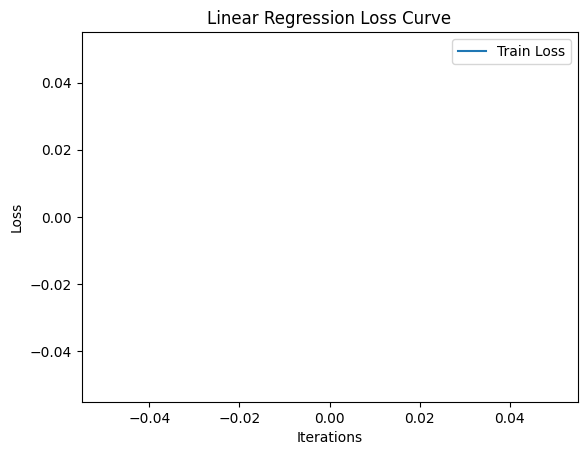

In [10]:
plt.plot(lin_reg.loss_curve_ if hasattr(lin_reg, 'loss_curve_') else [0], label='Train Loss')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Linear Regression Loss Curve")
plt.legend()
plt.show()

# Train Decision Tree

In [11]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

# Train Random Forest

In [12]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

# Make Predictions

In [13]:
y_pred_lin = lin_reg.predict(X_test)
y_pred_dt = dt_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate Models

In [17]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))
    print("------------------------------")

    # Call function for each model
evaluate_model(y_test, y_pred_lin, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression Performance:
MAE: 1434.0842949537903
RMSE: 2284.778090967769
R² Score: 0.7578982799002935
------------------------------
Decision Tree Performance:
MAE: 574.4379971923257
RMSE: 1523.8274307169831
R² Score: 0.892308506957961
------------------------------
Random Forest Performance:
MAE: 565.395475915651
RMSE: 1335.7491466629963
R² Score: 0.9172515943754598
------------------------------


# Save the best model

In [18]:
best_model = rf_reg  # Assuming Random Forest performs best
joblib.dump(best_model, "flight_price_model.pkl")

['flight_price_model.pkl']

# Plot Actual vs. Predicted

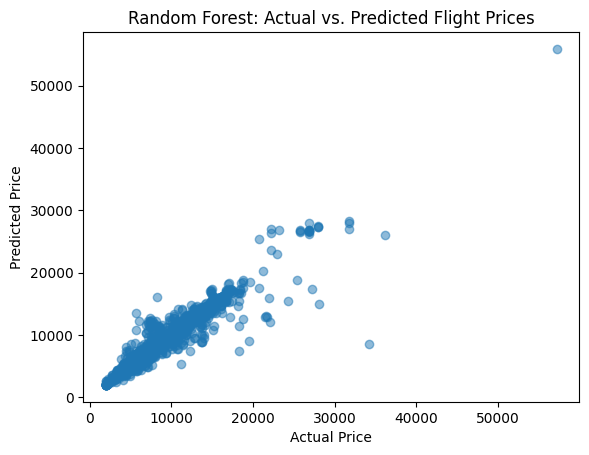

In [19]:
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs. Predicted Flight Prices")
plt.show()
